# Precificação de imoveis

Vamos usar um dataset dentro de um desafio do Kaggle:
https://www.kaggle.com/datasets/kaggleshashankk/house-price-data-of-sao-paulo


### Desafios:

    1. A média da metragem para cada um dos bairros.
    
    2. Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas
    
    3. Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, assim como tentar colocar alguma conclusão.
    
    4. Pegar outras estatísticas dos dados (como média, mediana, min, max).
    
    5- Descobrir quais são os bairros que não tem nome de rua

In [2]:
# bibliotecas
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
# importando o dataframe
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

# primeiros valores do DataFrame
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [2]:
# informacao geral de como os dados do DataFrame estao organizados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


### 1. A média da metragem para cada um dos bairros


In [4]:
dados.groupby('Bairro')['Metragem'].mean()

Bairro
Aclimação            253.056818
Alto da Boa Vista    418.875000
Alto da Lapa         294.337209
Alto da Mooca        270.050000
Alto de Pinheiros    433.444988
                        ...    
Vila Água Funda      152.200000
Água Branca          191.000000
Água Fria            165.416667
Água Funda           139.000000
Água Rasa            340.250000
Name: Metragem, Length: 701, dtype: float64

### 2. Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas

In [16]:
# Usando o Bairro "Planalto Paulista" como exemplo

forma1_SelecionaBairro = dados[dados["Bairro"] == "Planalto Paulista"]                            

forma2_SelecionaBairro = dados.loc[dados['Bairro'] == "Planalto Paulista"]

forma3_SelecionaBairro = dados.iloc[dados.index[dados['Bairro'] == "Planalto Paulista"]]    

forma3_SelecionaBairro

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
75,Rua Francisco de Paula Brito,Planalto Paulista,São Paulo,250,3,4,4,R$ 2.190.000
79,Rua Elisa Rodrigues,Planalto Paulista,São Paulo,184,4,3,4,R$ 1.390.000
87,NaN,Planalto Paulista,São Paulo,119,2,2,2,R$ 670.000
116,Alameda dos Guainumbis,Planalto Paulista,São Paulo,200,4,6,3,R$ 2.014.000
...,...,...,...,...,...,...,...,...
9878,NaN,Planalto Paulista,São Paulo,200,3,3,3,R$ 680.000
9883,Alameda dos Tupinas,Planalto Paulista,São Paulo,405,4,6,4,R$ 1.550.000
9930,Avenida Odila,Planalto Paulista,São Paulo,262,3,6,4,R$ 1.500.000
9966,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000


## 3. Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, assim como tentar colocar alguma conclusão.

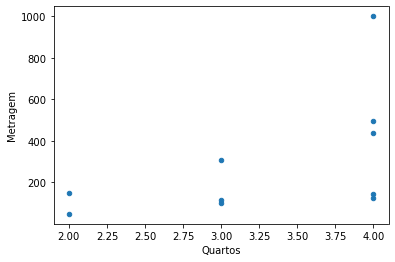

In [49]:
dados.head(10).plot.scatter('Quartos', 'Metragem')                         
plt.show()
# Conclusão: quanto mais quartos maior é a metragem, o mesmo vale para Banheiros, Vagas e Valor 

## 4. Pegar outras estatísticas dos dados (como média, mediana, min, max).


In [26]:
dados.describe()

,Metragem,Quartos,Banheiros,Vagas
count,10008.000000,10008.000000,10008.000000,10008.000000
mean,442.300659,3.483114,3.879097,4.097222
std,7515.379389,1.064200,1.988467,2.824014
min,10.000000,1.000000,1.000000,1.000000
25%,173.000000,3.000000,2.000000,2.000000
50%,290.000000,3.000000,4.000000,4.000000
75%,460.250000,4.000000,5.000000,5.000000
max,750000.000000,16.000000,40.000000,50.000000


In [27]:
### Para a Metragem, fazendo de outra forma

# quantidade de bairros 
n_imoveis_bairro = dados["Bairro"].value_counts() 


# crindo um dataframe 
metragem_bairros = pd.DataFrame(columns=['Bairro', 'Media da Metragem','Mediana da Metragem', 'Minimo da Metragem', 'Maximo da Metragem'])  


for i in range(len(n_imoveis_bairro)):
    bairro = n_imoveis_bairro.index[i]
  
    media = dados[['Metragem']].loc[dados['Bairro'] == str(bairro)].mean()[0]           
    mediana = dados[['Metragem']].loc[dados['Bairro'] == str(bairro)].median()[0]        
    maximo = dados[['Metragem']].loc[dados['Bairro'] == str(bairro)].max()[0]          
    minimo = dados[['Metragem']].loc[dados['Bairro'] == str(bairro)].min()[0]                
    metragem_bairros = metragem_bairros.append({"Bairro":str(bairro), "Media da Metragem":media, "Mediana da Metragem":mediana, "Minimo da Metragem":minimo, "Maximo da Metragem":maximo}, ignore_index=True)  
        
metragem_bairros  

,Bairro,Media da Metragem,Mediana da Metragem,Minimo da Metragem,Maximo da Metragem
0,Alto de Pinheiros,433.444988,412.0,100,1530
1,Jardim Guedala,2486.640199,580.0,250,750000
2,Jardim Paulista,486.297735,450.0,110,1205
3,Brooklin Paulista,323.676113,286.0,70,874
4,Jardim Europa,561.566667,552.5,120,1510
...,...,...,...,...,...
696,Burgo Paulista,150.000000,150.0,150,150
697,Vila Nova Pauliceia,100.000000,100.0,100,100
698,Parque do Terceiro Lago,200.000000,200.0,200,200
699,Jardim Fernandes,300.000000,300.0,300,300


## 5. Descobrir quais são os bairros que não tem nome de rua

In [33]:
RuaSemNome = dados['Rua'].isnull()

dados_RuaSemNome = dados['Bairro'][RuaSemNome].value_counts()

pd.DataFrame(dados_RuaSemNome)

,Bairro
Jardim Guedala,190
Alto de Pinheiros,169
Jardim Paulista,138
Jardim Europa,128
Jardim Leonor,118
...,...
Jardim Vila Carrão,1
Parque Mandaqui,1
Burgo Paulista,1
Parque Peruche,1
